### Credit Card Customers Churn Analysis
Hypothetical Scenario:

Credit card company X is trying to reduce customer churn rate. I have been brought on as Data Analytics Consultant at Company X. My goal is to identify customers who are unhappy and are at risk of churning before it is too late. 

My plan of action is analyze the demographic and financial data of clients at Company X to identify customers at risk of churning, build and evaluate the model, and use key results from my classification model  to highlight clients at risk of leaving, allowing Company X to truly focus on their retention efforts.

For this project, I will be working with the Credit Card Customers dataset stored in Credit Card Customers.csv
This dataset was taken from Kaggle (https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?select=BankChurners.csv).
It includes 21 explanatory variables describing aspects of customers. Of the 21 features, 6 are categorical while the rest are numerical variables. My target varialbe is Attrition flag (1  for Attrited Customer and 0 for Existing Customer. A description for each feature can be found below.

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition Flag: Internal event (customer activity) variable - if the account is closed then 1 (Attrited Customer) else 0 (Existing Customer)
3. Customer Age: Demographic variable - Customer's Age in Years
4. Gender: Demographic variable - M=Male, F=Female
5. Dependent count: Demographic variable - Number of dependents
6. Education Level: Demographic variable - Educational Qualification of the account holder (high school, college, graduate, post-graduate, doctorate, uneducated, unknown)
7. Marital Status: Demographic variable (Married, Single, Divorced, Unknown)
8. Income Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
9. Card Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
10. Months on book: Period of relationship with bank in months
11. Total Relationship Count: Total no. of products held by the customer
12. Months Inactive 12 mon: No. of months inactive in the last 12 months
13. Contacts Count 12 mon: No. of Contacts in the last 12 months
14. Credit Limit: Credit Limit on the Credit Card
15. Total Revolving Bal: Total Revolving Balance on the Credit Card
16. Avg Open To Buy: Open to Buy Credit Line (Average of last 12 months)
17. Total Amt Chng Q4 Q1: Change in Transaction Amount (Q4 over Q1)
18. Total Trans Amt: Total Transaction Amount (Last 12 months)
19. Total Trans Ct: Total Transaction Count (Last 12 months)
20. Total Ct Chng Q4 Q1: Change in Transaction Count (Q4 over Q1)
21. Avg Utilization Ratio: Average Card Utilization Ratio

For this project, the following steps will be used:
1. Data munging and pre-processing
2. Explanotory data analysis (creation of data visualizaton to analyse the data)
3. Encode categorical variables
4. Create correlation matrix and heatmap 
5. Create a train and test split
7. Train classification models
8. Evaluate the models

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [2]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
def get_model_name(model):
    ' return name of model (class) as a string '
    return str(model.__class__).split('.')[-1][:-2]
def rdot(w,x):
    ' apply np.dot on swapped args '
    return np.dot(x,w)

#### 1. Data Munging and Pre-Processing

In [4]:
data = pd.read_csv('BankChurners.csv')

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
data.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
data.shape

(10127, 23)

In [8]:
#last two columns & the first one are not applicable
df = data.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [9]:
df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [10]:
print(df.dtypes)

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [11]:
print(df['Attrition_Flag'].unique())
print(df['Gender'].unique())
print(df['Education_Level'].unique())
print(df['Marital_Status'].unique())
print(df['Income_Category'].unique())
print(df['Card_Category'].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [12]:
#checking for missing values
print(df.isnull().sum().sum())

0


In [13]:
df.shape

(10127, 20)

#### 2. Explanatory Data Analysis (creation of data visualizaton to analyse the data)

In [14]:
print(df['Attrition_Flag'].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


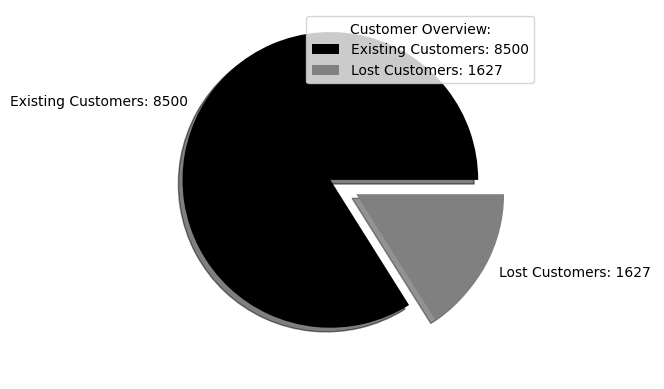

In [15]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([8500, 1627])
mylabels = ["Existing Customers: 8500", "Lost Customers: 1627 "]
mycolors = ["black", "gray"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, colors = mycolors)
plt.legend(title = "Customer Overview:")
plt.show() 

In [16]:
print(df['Gender'].value_counts())

F    5358
M    4769
Name: Gender, dtype: int64


In [17]:
print(df['Education_Level'].value_counts())

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


In [18]:
print(df['Marital_Status'].value_counts())

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


In [19]:
print(df['Income_Category'].value_counts())

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


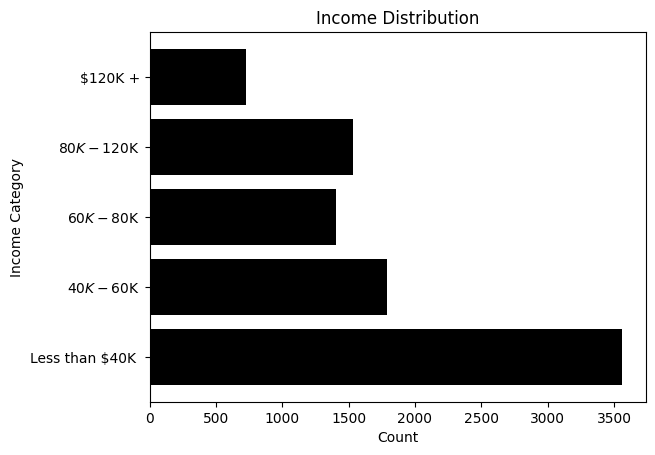

In [20]:
x = np.array(["Less than $40K ", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"])
y = np.array([3561, 1790,1402,1535, 727])

plt.barh(x, y, color="black")
plt.title('Income Distribution')
plt.xlabel('Count')
plt.ylabel('Income Category')
plt.show()

In [21]:
print(df['Card_Category'].value_counts())

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

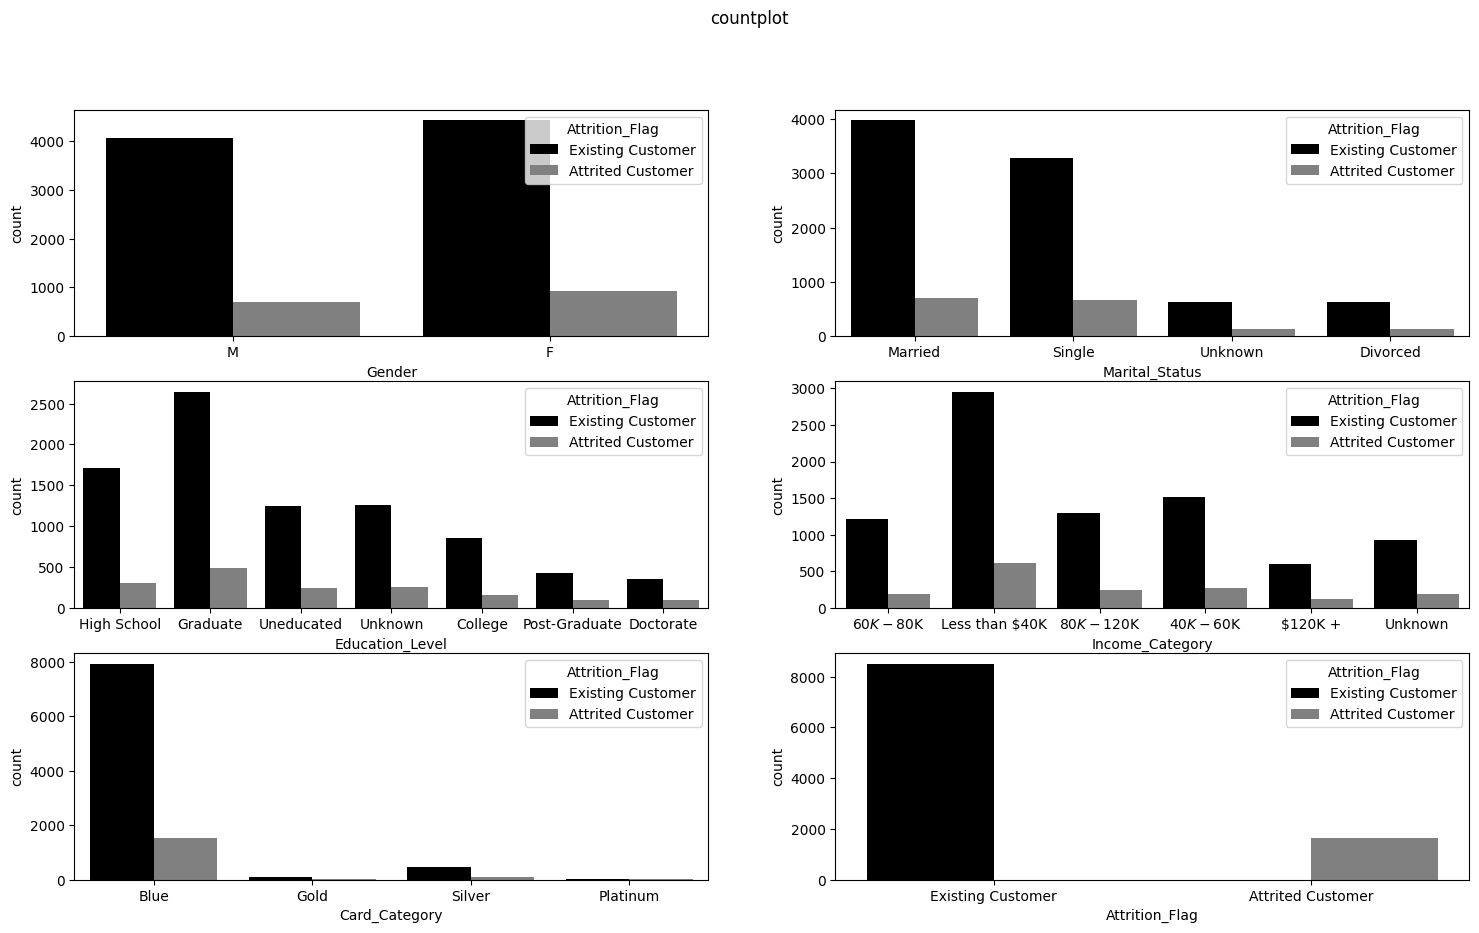

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('countplot')

sns.countplot(ax=axes[0, 0],x=df['Gender'],hue=df['Attrition_Flag'], palette=['black',"gray"])
sns.countplot(ax=axes[0, 1], x=df['Marital_Status'],hue=df['Attrition_Flag'],palette=['black',"gray"])
sns.countplot(ax=axes[1, 0], x=df['Education_Level'],hue=df['Attrition_Flag'], palette=['black',"gray"])
sns.countplot(ax=axes[1, 1], x=df['Income_Category'],hue=df['Attrition_Flag'], palette=['black',"gray"])
sns.countplot(ax=axes[2, 0], x=df['Card_Category'],hue=df['Attrition_Flag'], palette=['black',"gray"])
sns.countplot(ax=axes[2, 1], x=df['Attrition_Flag'],hue=df['Attrition_Flag'], palette=['black',"gray"])

In [23]:
data_descriptive = df.describe()
data_descriptive

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### 3. Encoding Categorical Variables

In [24]:
#encoding categorical variables
from sklearn.preprocessing import LabelEncoder

df_1 =MultiColumnLabelEncoder(columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']).fit_transform(df)

In [25]:
df_1.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [26]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [27]:
print(df_1['Attrition_Flag'].unique())
print(df_1['Gender'].unique())
print(df_1['Education_Level'].unique())
print(df_1['Marital_Status'].unique())
print(df_1['Income_Category'].unique())
print(df_1['Card_Category'].unique())

[1 0]
[1 0]
[3 2 5 6 0 4 1]
[1 2 3 0]
[2 4 3 1 0 5]
[0 1 3 2]


In [28]:
data_encoded = {
    'Attrition_Flag': [1, 0, 1, 0],
    'Gender': [1, 0, 1, 0],
    'Education_Level': [3, 2, 5, 6],
    'Marital_Status': [1, 2, 3, 0],
    'Income_Category': [2, 4, 3, 1],
    'Card_Category': [0, 1, 3, 2]
}

df_encoded = pd.DataFrame(data_encoded)

values = {
    'Attrition_Flag': {1: 'Existing Customer', 0: 'Attrited Customer'},
    'Gender': {0: 'F', 1: 'M'},
    'Education_Level': {3: 'High School', 2: 'Graduate', 5: 'Uneducated', 6: 'Unknown', 0: 'College', 4: 'Post-Graduate', 1: 'Doctorate'},
    'Marital_Status': {1: 'Married', 2: 'Single', 3: 'Unknown', 0: 'Divorced'},
    'Income_Category': {2: '$60K - $80K', 4: 'Less than $40K', 3: '$80K - $120K', 1: '$40K - $60K'},
    'Card_Category': {0: 'Blue', 1: 'Gold', 3: 'Silver', 2: 'Platinum'}
}

for col in df_encoded.columns:
    print(col, ':', values[col])


Attrition_Flag : {1: 'Existing Customer', 0: 'Attrited Customer'}
Gender : {0: 'F', 1: 'M'}
Education_Level : {3: 'High School', 2: 'Graduate', 5: 'Uneducated', 6: 'Unknown', 0: 'College', 4: 'Post-Graduate', 1: 'Doctorate'}
Marital_Status : {1: 'Married', 2: 'Single', 3: 'Unknown', 0: 'Divorced'}
Income_Category : {2: '$60K - $80K', 4: 'Less than $40K', 3: '$80K - $120K', 1: '$40K - $60K'}
Card_Category : {0: 'Blue', 1: 'Gold', 3: 'Silver', 2: 'Platinum'}


#### 4. Correlation Matrix and Heatmap

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.018203,0.037272,-0.018991,-0.005551,-0.018597,-0.017584,0.006038,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Customer_Age,-0.018203,1.000000,-0.017312,-0.122254,0.004083,-0.011265,-0.013474,-0.020131,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Gender,0.037272,-0.017312,1.000000,0.004563,0.000694,-0.000007,-0.539731,0.079203,-0.006728,0.003157,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Dependent_count,-0.018991,-0.122254,0.004563,1.000000,0.003788,0.000337,-0.035417,0.021674,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Education_Level,-0.005551,0.004083,0.000694,0.003788,1.000000,0.014720,-0.010442,-0.007212,-0.004953,0.009636,-0.008077,0.008500,0.003076,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477
Marital_Status,-0.018597,-0.011265,-0.000007,0.000337,0.014720,1.000000,0.009659,0.035947,-0.012084,-0.021393,0.001709,0.001476,0.031292,-0.025386,0.033562,-0.036210,0.044553,0.075888,0.000258,-0.027451
Income_Category,-0.017584,-0.013474,-0.539731,-0.035417,-0.010442,0.009659,1.000000,-0.051632,-0.016375,0.008138,0.024037,-0.018367,-0.225394,-0.025815,-0.223033,-0.004534,-0.014686,0.033498,0.014892,0.123287
Card_Category,0.006038,-0.020131,0.079203,0.021674,-0.007212,0.035947,-0.051632,1.000000,-0.014749,-0.073770,-0.016816,-0.000919,0.484090,0.017027,0.482462,0.004061,0.176377,0.116579,-0.004541,-0.205089
Months_on_book,-0.013687,0.788912,-0.006728,-0.103062,-0.004953,-0.012084,-0.016375,-0.014749,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.150005,-0.010931,0.003157,-0.039076,0.009636,-0.021393,0.008138,-0.073770,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663


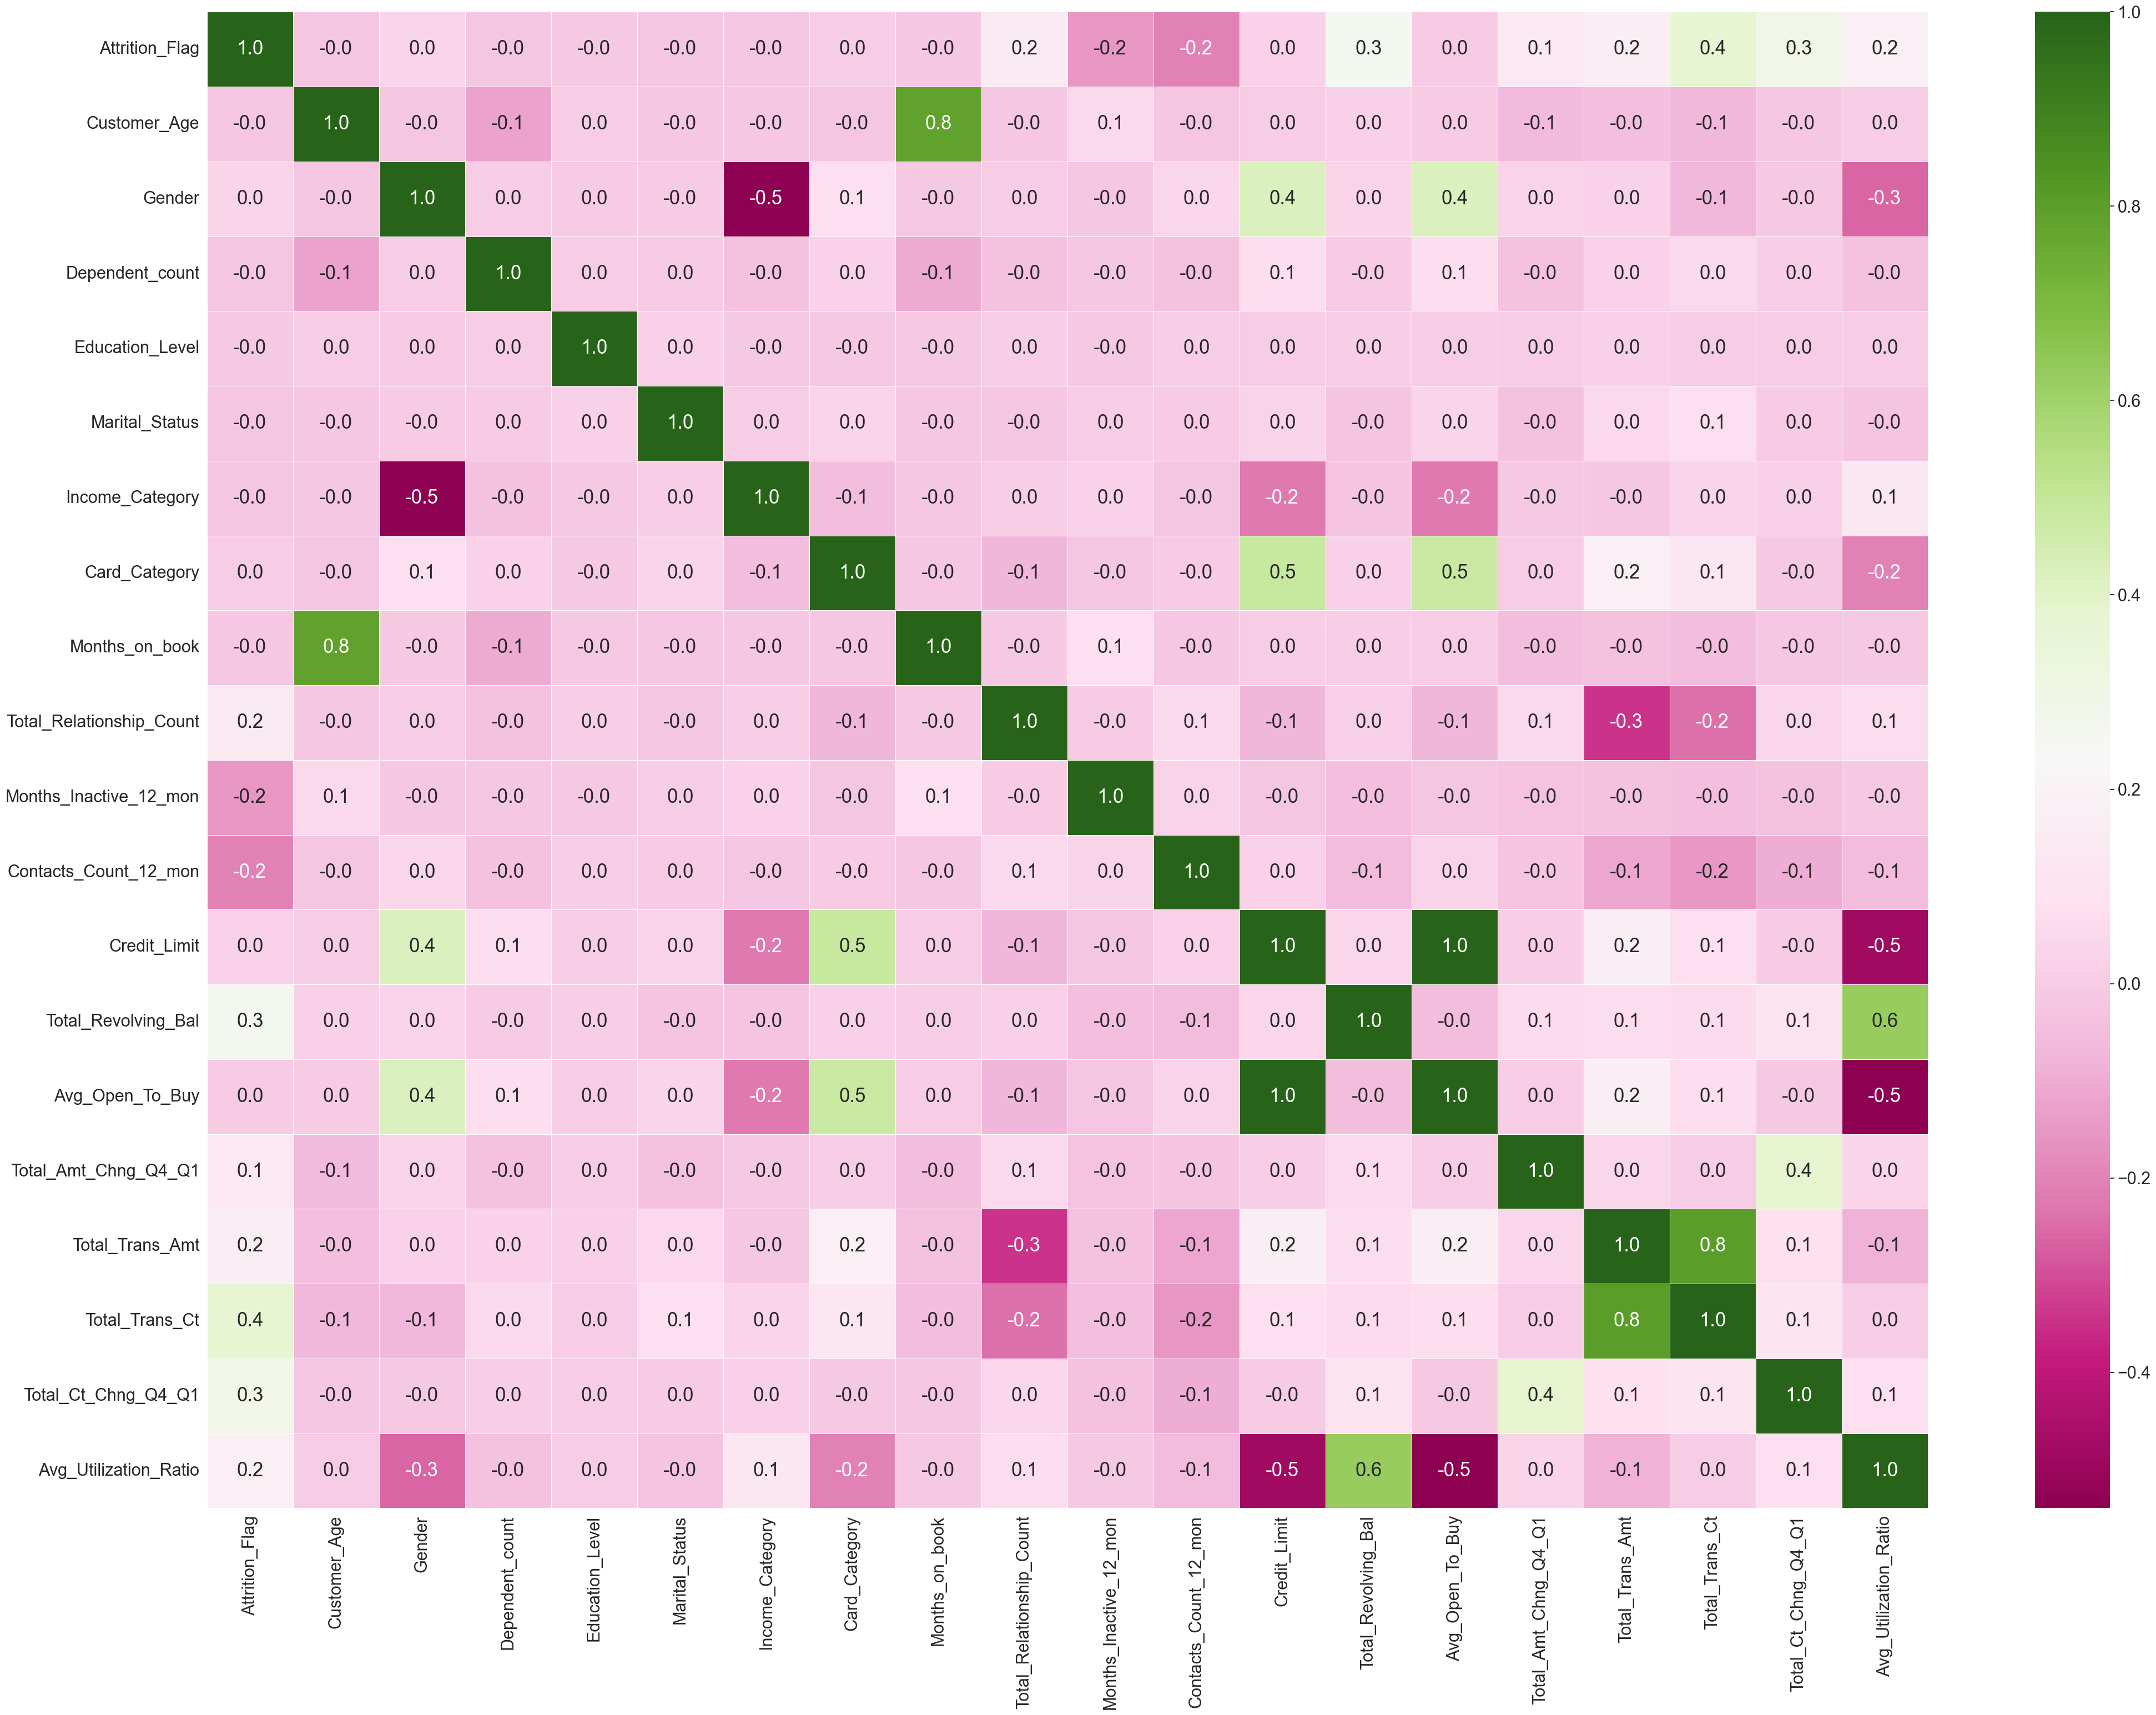

In [29]:
#correlation matrix with encoding
import matplotlib.pyplot as plt
correlation=df_1.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)
correlation

#### Balancing The Sample Size

In [30]:
X_ftrs = df_1[['Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y_tgt  = df_1['Attrition_Flag']

In [31]:
#my data sample is not big enough, thus, I am oversampling to correct for it
from imblearn.combine import SMOTETomek

smk=SMOTETomek(random_state=42)
xres,yres=smk.fit_resample(X_ftrs,y_tgt)

#reference: https://imbalanced-learn.org/stable/over_sampling.html

In [32]:
#making sure the dependent variable is balanced
yres_series = pd.Series(yres)
print(yres_series.value_counts())

1    8248
0    8248
Name: Attrition_Flag, dtype: int64


Good to go! The sample size for 0 and 1 is now balanced. 

#### 5. Train and test split

In [33]:
HP_tts = skms.train_test_split(xres, yres)

(X_train, X_test,
 y_train,  y_test) = HP_tts

print("Train features shape:", X_train.shape)
print("Test features shape:",  X_test.shape)

print("Train target shape:", y_train.shape)
print("Test target shape:",  y_test.shape)

Train features shape: (12372, 19)
Test features shape: (4124, 19)
Train target shape: (12372,)
Test target shape: (4124,)


#### 6. Train Classification Models

##### Classifier 1: KNN

In [34]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #model obeject
knn_fit   = knn.fit(X_train, y_train) #training process
knn_preds = knn_fit.predict(X_test) #predication based on the test set

#evaluate our predictions against the held-back testing targets
print("3NN algorithm was able to correctly classify:", 
      metrics.accuracy_score(y_test, knn_preds))
print('of the samples in the dataset')

3NN algorithm was able to correctly classify: 0.9221629485935985
of the samples in the dataset


In [35]:
#confusion matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = metrics.confusion_matrix(y_test, 
                              knn_preds)
print("confusion matrix:", cm, sep="\n")

confusion matrix:
[[2006   66]
 [ 255 1797]]


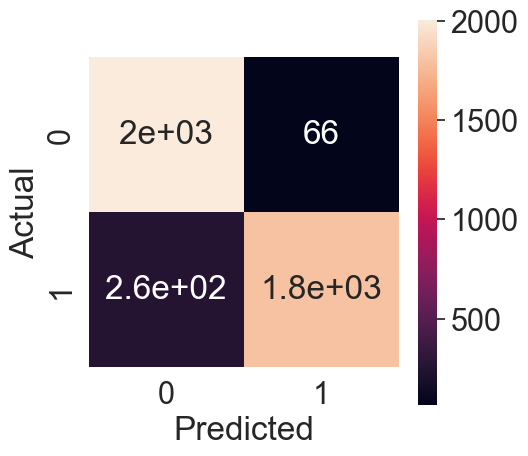

In [36]:
#confusion matrix (heatmap)

fig, ax = plt.subplots(1,1,figsize=(5,5))
cm = metrics.confusion_matrix(y_test, knn_preds)
ax = sns.heatmap(cm, annot=True, square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [37]:
#Calculating the precision, recall and accuracy
print(metrics.classification_report(y_test, 
                                    knn_preds))

# verify sums-across-rows
cm = metrics.confusion_matrix(y_test, knn_preds)
print("row counts equal support:", cm.sum(axis=1))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2072
           1       0.96      0.88      0.92      2052

    accuracy                           0.92      4124
   macro avg       0.93      0.92      0.92      4124
weighted avg       0.93      0.92      0.92      4124

row counts equal support: [2072 2052]


##### Classifier 2: Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

print('The top five features are:')

clf = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
df = pd.DataFrame({'feature':X_train.columns.values, 'feature importance': clf.feature_importances_})
top_features = df.sort_values(['feature importance'],ascending=False)['feature'].head(5).tolist()
top_features

The top five features are:


['Total_Trans_Ct',
 'Total_Trans_Amt',
 'Total_Revolving_Bal',
 'Total_Relationship_Count',
 'Total_Ct_Chng_Q4_Q1']

In [39]:
dtc = DecisionTreeClassifier(max_depth=6)
dtc_fit=dtc.fit(X_train, y_train)
print(dtc_fit)
dtc_preds=dtc_fit.predict(X_test)

print("The DTC algorithm was able to correctly classify:", 
      metrics.accuracy_score(y_test, dtc_preds))
print('of the samples in the dataset')

DecisionTreeClassifier(max_depth=6)
The DTC algorithm was able to correctly classify: 0.9338021338506305
of the samples in the dataset


In [40]:
#confusion matrix
cm = confusion_matrix(y_test, dtc_preds)
print(cm)

[[1926  146]
 [ 127 1925]]


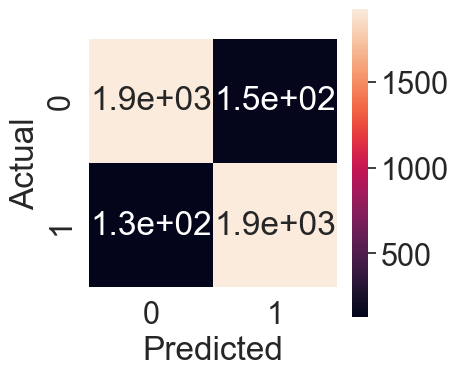

In [41]:
#confusion matrix (heatmap)

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = metrics.confusion_matrix(y_test, dtc_preds)
ax = sns.heatmap(cm, annot=True, square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [42]:
#Calculating the precision, recall and accuracy
print(metrics.classification_report(y_test, 
                                    dtc_preds))

# verify sums-across-rows
cm = metrics.confusion_matrix(y_test, dtc_preds)
print("row counts equal support:", cm.sum(axis=1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2072
           1       0.93      0.94      0.93      2052

    accuracy                           0.93      4124
   macro avg       0.93      0.93      0.93      4124
weighted avg       0.93      0.93      0.93      4124

row counts equal support: [2072 2052]


##### Classifier 3: Naive Bayes

In [43]:
nb    = naive_bayes.GaussianNB() 
nb_fit   = nb.fit(X_train, y_train)

nb_preds = nb_fit.predict(X_test)
print(nb_preds)
#Finding the score (mean accuracy) of NB classifier using X_test and y_test.

print("The NB algorithm was able to correctly classify:", 
      metrics.accuracy_score(y_test, nb_preds))
print('of the samples in the dataset')

[1 1 0 ... 0 1 0]
The NB algorithm was able to correctly classify: 0.8191076624636275
of the samples in the dataset


In [44]:
#confusion matrix
cm = confusion_matrix(y_test, nb_preds)
print(cm)

[[1741  331]
 [ 415 1637]]


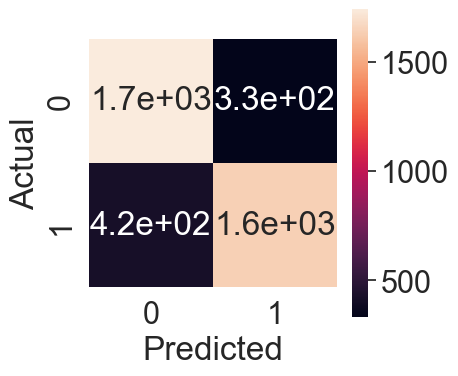

In [45]:
#confusion matrix (heatmap)

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = metrics.confusion_matrix(y_test, nb_preds)
ax = sns.heatmap(cm, annot=True, square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [46]:
#Calculating the precision, recall and accuracy
print(metrics.classification_report(y_test, 
                                    nb_preds))

# verify sums-across-rows
cm = metrics.confusion_matrix(y_test, nb_preds)
print("row counts equal support:", cm.sum(axis=1))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2072
           1       0.83      0.80      0.81      2052

    accuracy                           0.82      4124
   macro avg       0.82      0.82      0.82      4124
weighted avg       0.82      0.82      0.82      4124

row counts equal support: [2072 2052]


##### Classifier 4: Logisitic Regression Classifier

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg

scaler = StandardScaler()
model = make_pipeline(scaler, logreg)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [48]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1802  270]
 [ 255 1797]]


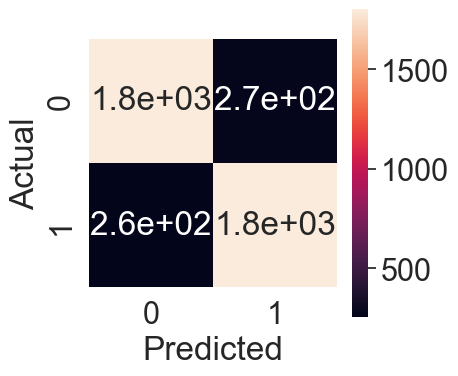

In [49]:
#confusion matrix (heatmap)

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [50]:
#Calculating the precision, recall and accuracy
print(metrics.classification_report(y_test, 
                                    y_pred))

# verify sums-across-rows
cm = metrics.confusion_matrix(y_test, y_pred)
print("row counts equal support:", cm.sum(axis=1))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2072
           1       0.87      0.88      0.87      2052

    accuracy                           0.87      4124
   macro avg       0.87      0.87      0.87      4124
weighted avg       0.87      0.87      0.87      4124

row counts equal support: [2072 2052]


#### 7. Evaluating the Models

kNN3: 0.92
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2072
           1       0.96      0.88      0.92      2052

    accuracy                           0.92      4124
   macro avg       0.93      0.92      0.92      4124
weighted avg       0.93      0.92      0.92      4124

confusion matrix:
[[2006   66]
 [ 255 1797]]
kNN5: 0.91
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2072
           1       0.96      0.86      0.91      2052

    accuracy                           0.91      4124
   macro avg       0.92      0.91      0.91      4124
weighted avg       0.92      0.91      0.91      4124

confusion matrix:
[[1991   81]
 [ 286 1766]]
kNN10: 0.89
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2072
           1       0.95      0.83      0.88      2052

    accuracy                           0.89      4124
   m

/Users/ladeniyi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


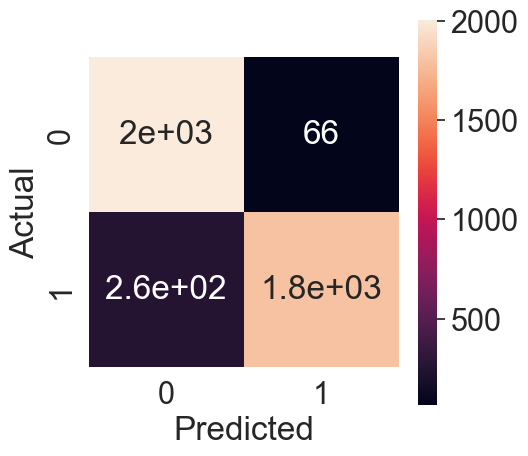

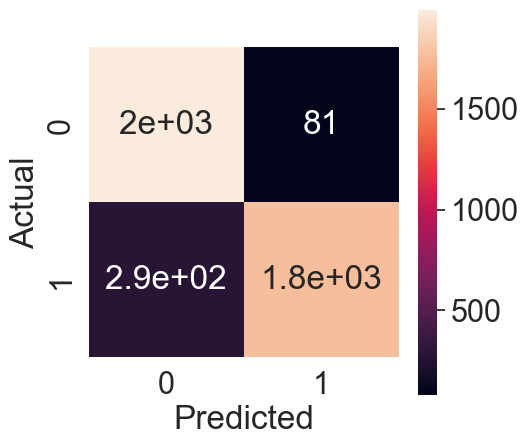

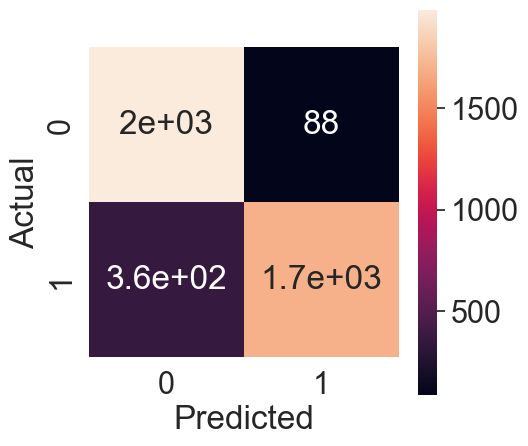

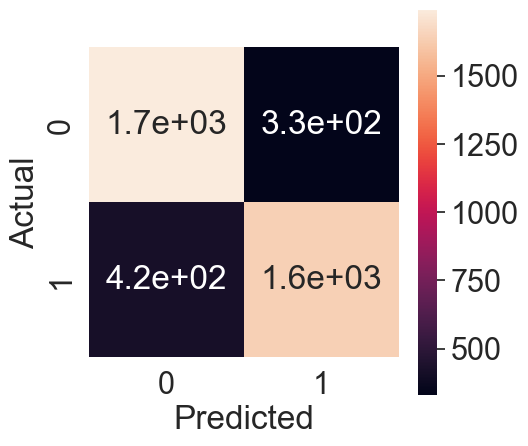

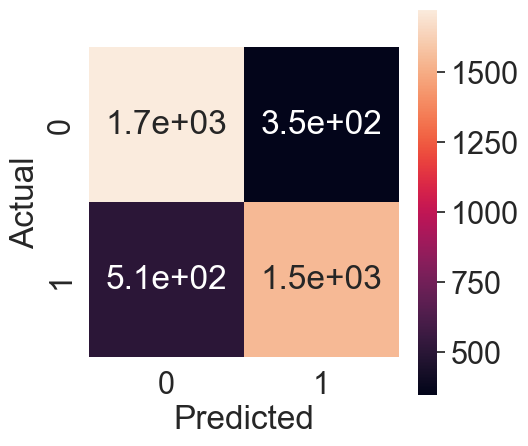

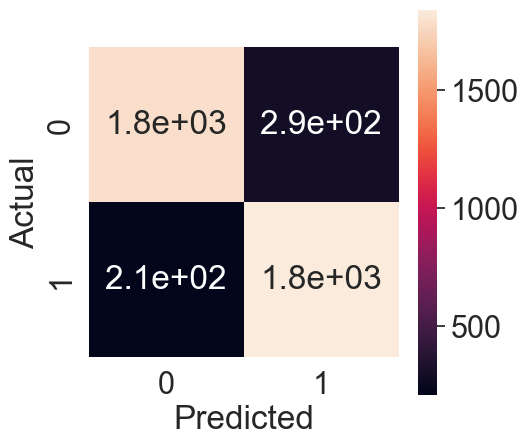

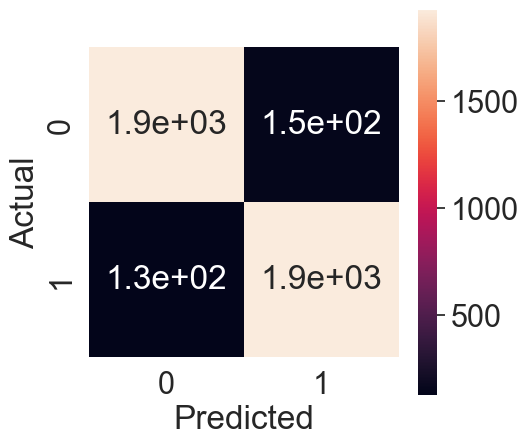

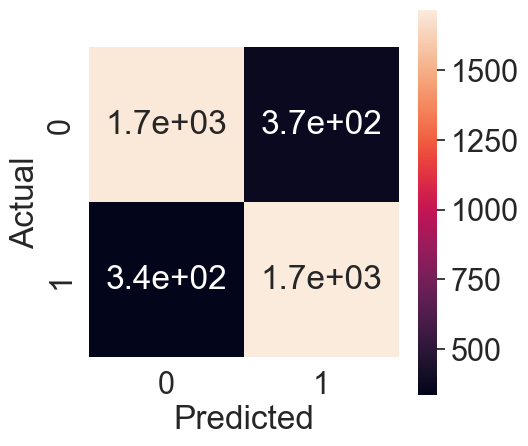

In [51]:
models = {'kNN3': neighbors.KNeighborsClassifier(n_neighbors=3),
          'kNN5': neighbors.KNeighborsClassifier(n_neighbors=5),
          'kNN10': neighbors.KNeighborsClassifier(n_neighbors=10),
          'NB' : naive_bayes.GaussianNB(),
          'DTC2': DecisionTreeClassifier(max_depth=2),
          'DTC3': DecisionTreeClassifier(max_depth=3),
          'DTC6': DecisionTreeClassifier(max_depth=6),
          'LogReg': LogisticRegression()}
          

for name, model in models.items():
    fit = model.fit(X_train, y_train)
    predictions = fit.predict(X_test)
    
    score = metrics.accuracy_score(y_test, predictions)
    print("{:>3s}: {:>0.2f}".format(name,score))
        
    print(metrics.classification_report(y_test, 
                                    predictions))
    
    cm = metrics.confusion_matrix(y_test, 
                              predictions)
    print("confusion matrix:", cm, sep="\n")
    
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    cm = metrics.confusion_matrix(y_test, predictions)
    ax = sns.heatmap(cm, annot=True, square=True)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual');

Based on these results I can conclude that the decision tree model with depth = 3 is the optimal model with better accuracy, precision and recall. The model is able to predict customers at risk of being churned with an accuracy of 94%

References: 
    https://www.w3schools.com/python/matplotlib_pie_charts.asp
    https://stackoverflow.com/questions/57417970/how-to-set-custom-colors-on-a-count-plot-in-seaborn
    https://stackoverflow.com/questions/62819569/how-to-return-the-features-that-used-in-decision-tree-that-created-by-decisiontr#:~:text=from%20sklearn.tree%20import%20DecisionTreeClassifier%20decesionTreeModel%20%3D%20DecisionTreeClassifier%20%28random_state%3D0%29,%3D%20%5Bi%20for%20i%20in%20top_5_feature%5D%20print%20%28top_5_feature_list%29

